TASK 1

In [1]:
import sklearn.datasets
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [57]:
cancer = load_breast_cancer(return_X_y = True, as_frame = True)

a = cancer[0]
a['typeofcancer'] = cancer[1]
a.iloc[0:2, :]

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   

   worst symmetry  worst fractal dimension  typeofcancer  
0          0.4601                  0.11890             0  
1          0.2750                  0.08902             0  

[2 rows x 31 columns]

In [58]:
a.shape

(569, 31)

In [59]:
df = a.iloc[:, [0, 6, 7, 8, 30]]
df.iloc[0:2, :] #Show the first two rows


mean radius  mean concavity  mean concave points  mean symmetry  \
0        17.99          0.3001              0.14710         0.2419   
1        20.57          0.0869              0.07017         0.1812   

   typeofcancer  
0             0  
1             0

In [60]:
df.iloc[[17, 18, 19, 20, 21], :] #Show row indices; 17, 18, 19, 20, 21

mean radius  mean concavity  mean concave points  mean symmetry  \
17       16.130         0.17220              0.10280         0.2164   
18       19.810         0.14790              0.09498         0.1582   
19       13.540         0.06664              0.04781         0.1885   
20       13.080         0.04568              0.03110         0.1967   
21        9.504         0.02956              0.02076         0.1815   

    typeofcancer  
17             0  
18             0  
19             1  
20             1  
21             1

TASK 2

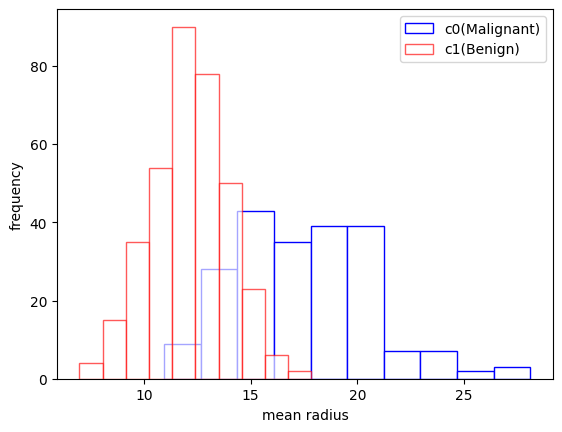

In [61]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

import numpy as np
mean_radius = np.array(df.iloc[:, 4])

pos = 0
mean_radius_malignant = np.array([])
mean_radius_benign = np.array([])

for row in mean_radius:
    if row == 0:
        mean_radius_malignant = np.append(mean_radius_malignant, df.iloc[pos, 0])
    else:
        mean_radius_benign = np.append(mean_radius_benign, df.iloc[pos, 0])
    pos += 1

plt.hist(mean_radius_malignant, bins=10, color='w', edgecolor='b', alpha=1.0, label='c0(Malignant)')
plt.hist(mean_radius_benign, bins=10, color = 'w', edgecolor='r', alpha=0.65, label='c1(Benign)')


plt.xlabel("mean radius")
plt.ylabel("frequency")
plt.legend()
plt.show()


In [70]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
 
import numpy as np
mean_radius = np.array(df.iloc[:, 4])
pos = 0
mean_radius_malignant = np.array([])
mean_radius_benign = np.array([])
mean_concativity_malignant = np.array([])
mean_concativity_benign = np.array([])

for row in mean_radius:
    if row == 0:
        mean_radius_malignant = np.append(mean_radius_malignant, df.iloc[pos, 0])
        mean_concativity_malignant = np.append(mean_concativity_malignant, df.iloc[pos, 1])
    else:
        mean_radius_benign = np.append(mean_radius_benign, df.iloc[pos, 0])
        mean_concativity_benign = np.append(mean_concativity_benign, df.iloc[pos, 1])
    pos += 1

ax.scatter(mean_concativity_malignant, mean_radius_malignant, c='b', marker='o', s=80, label="c0(M)")
ax.scatter(mean_concativity_benign, mean_radius_benign, c='r', marker='o', s=80, label="c1(B)")


plt.xticks([0.0, 0.2, 0.4],['0.0', '0.2', '0.4'])
plt.xlabel("mean concativity")
plt.ylabel("mean radius")
plt.legend()
plt.show()

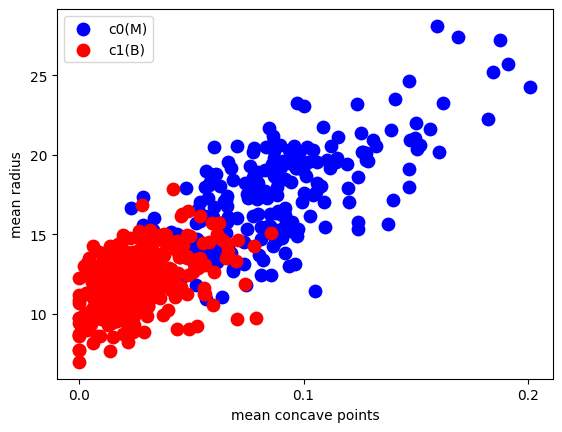

In [76]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

import numpy as np
mean_radius = np.array(df.iloc[:, 4])
pos = 0
mean_radius_malignant = np.array([])
mean_radius_benign = np.array([])
mean_concave_malignant = np.array([])
mean_concave_benign = np.array([])

for row in mean_radius:
    if row == 0:
        mean_radius_malignant = np.append(mean_radius_malignant, df.iloc[pos, 0])
        mean_concave_malignant = np.append(mean_concave_malignant, df.iloc[pos, 2])
    else:
        mean_radius_benign = np.append(mean_radius_benign, df.iloc[pos, 0])
        mean_concave_benign = np.append(mean_concave_benign, df.iloc[pos, 2])
    pos += 1

ax.scatter(mean_concave_malignant, mean_radius_malignant, c='b', marker='o', s=80, label="c0(M)")
ax.scatter(mean_concave_benign, mean_radius_benign, c='r', marker='o', s=80, label="c1(B)")


plt.xticks([0.0, 0.1, 0.2],['0.0', '0.1', '0.2'])
plt.xlabel("mean concave points")
plt.ylabel("mean radius")
plt.legend()
plt.show()

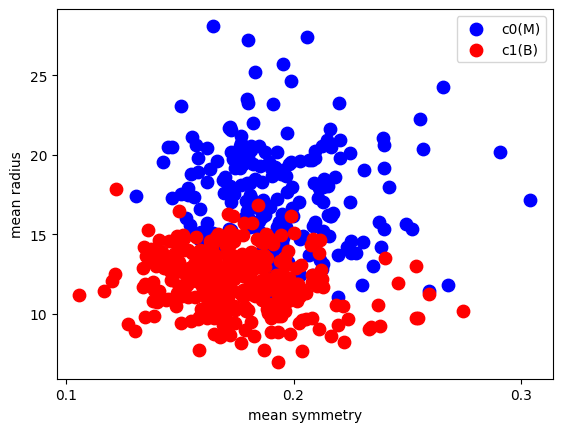

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

import numpy as np
mean_radius = np.array(df.iloc[:, 4])
pos = 0
mean_radius_malignant = np.array([])
mean_radius_benign = np.array([])
mean_symmetry_malignant = np.array([])
mean_symmetry_benign = np.array([])

for row in mean_radius:
    if row == 0:
        mean_radius_malignant = np.append(mean_radius_malignant, df.iloc[pos, 0])
        mean_symmetry_malignant = np.append(mean_symmetry_malignant, df.iloc[pos, 3])
    else:
        mean_radius_benign = np.append(mean_radius_benign, df.iloc[pos, 0])
        mean_symmetry_benign = np.append(mean_symmetry_benign, df.iloc[pos, 3])
    pos += 1

ax.scatter(mean_symmetry_malignant, mean_radius_malignant, c='b', marker='o', s=80, label="c0(M)")
ax.scatter(mean_symmetry_benign, mean_radius_benign, c='r', marker='o', s=80, label="c1(B)")


plt.xticks([0.1, 0.2, 0.3],['0.1', '0.2', '0.3'])
plt.xlabel("mean symmetry")
plt.ylabel("mean radius")
plt.legend()
plt.show()